In [73]:
%pylab inline
import cmasher as cmr
from pygadgetreader import readsnap

Populating the interactive namespace from numpy and matplotlib


In [54]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [55]:
LMC_mass = [8, 10, 18, 25]


In [57]:
LMC3 = np.loadtxt('../../bfe-py/code/boundLMC3_b1_091')
LMC4 = np.loadtxt('../../bfe-py/code/boundLMC4_b1_115_rs13')
LMC5 = np.loadtxt('../../bfe-py/code/boundLMC5_b1_110_rs20')
LMC6 = np.loadtxt('../../bfe-py/code/boundLMC6_b1_112_rs22')

In [5]:
LMC5_init = np.loadtxt('../../MW_anisotropy/code/test_snaps/LMC5_1140K_part_b1_110.txt')

In [104]:
MW = readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'pos', 'disk')
MW_mass = readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'mass', 'disk')

Returning DISK  Positions
Returning DISK  Mass


In [120]:
cmap = plt.cm.get_cmap('YlGnBu_r', 5) 

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#081d58
#225ea8
#41b6c4
#c7e9b4
#ffffd9


In [148]:
rcut = np.where((np.sqrt(MW[:,0]**2+(MW[:,1]-40)**2+(MW[:,2]+5)**2))<50)[0]

In [155]:
h_disk, binsx_disk, binsy_disk = np.histogram2d(MW[rcut,1]-42, MW[rcut, 2]+4, 100, weights=MW_mass[rcut])


<ipython-input-162-09a10f15462f>:1: RuntimeWarning: divide by zero encountered in log10
  contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r', vmin=-4, vmax=0.5)
<ipython-input-162-09a10f15462f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


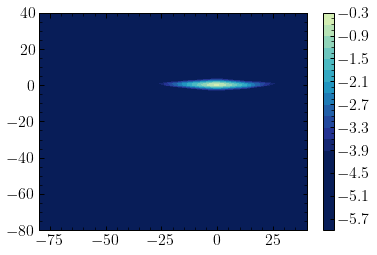

In [162]:
contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r', vmin=-4, vmax=0.5)
xlim(-80, 40)
ylim(-80, 40)
colorbar()
#scatter(0, 0)

ax = plt.axes() 
ax.set_facecolor("#081d58") 

In [319]:
h_lmc3, binsx_lmc3, binsy_lmc3 = np.histogram2d(LMC3[:,1]-38.3, LMC3[:, 2]-25.4, 100, weights=LMC3[:,6])
h_lmc4, binsx_lmc4, binsy_lmc4 = np.histogram2d(LMC4[:,1]-38.9, LMC4[:, 2]-23.9, 100, weights=LMC4[:,6])
h_lmc5, binsx_lmc5, binsy_lmc5 = np.histogram2d(LMC5[:,1]-40.4, LMC5[:, 2]-26, 100, weights=LMC5[:,6])
h_lmc6, binsx_lmc6, binsy_lmc6 = np.histogram2d(LMC6[:,1]-39.84, LMC6[:, 2]-23.09, 100, weights=LMC6[:,6])

In [320]:
print(np.sum(LMC6[:,6]))
print(np.sum(LMC5[:,6]))
print(np.sum(LMC4[:,6]))
print(np.sum(LMC3[:,6]))

7.247263485744284
6.113560623562241
4.578873164184227
4.026467210008059


In [321]:
orbit6 = np.loadtxt('../../MW_anisotropy/data/orbits/LMC6_100Mb0_orbit.txt')
lmc6_wrt_mw = orbit6[:113,6:9] - orbit6[:113,0:3]
print("LMC6 = ", lmc6_wrt_mw[111])

orbit5 = np.loadtxt('../../MW_anisotropy/data/orbits/LMC5_100Mb0_orbit.txt')
lmc5_wrt_mw = orbit5[:111,6:9] - orbit5[:111,0:3]
print("LMC5 = ",  lmc5_wrt_mw[109])

orbit4 = np.loadtxt('../../MW_anisotropy/data/orbits/LMC4_100Mb0_orbit.txt')
lmc4_wrt_mw = orbit4[:120,6:9] - orbit4[:120,0:3]
print("LMC4 = ",  lmc4_wrt_mw[114])

orbit3 = np.loadtxt('../../MW_anisotropy/data/orbits/LMC3_100Mb0_orbit.txt')
lmc3_wrt_mw = orbit3[:92,6:9] - orbit3[:92,0:3]
print("LMC3 = ", lmc3_wrt_mw[90])


LMC6 =  [ -1.188417 -39.84961  -23.097154]
LMC5 =  [ -1.115427 -40.412633 -26.019489]
LMC4 =  [ -1.015977 -38.908406 -23.926617]
LMC3 =  [ -0.756732 -38.31296  -25.444392]


In [322]:
dx3 = (binsx_lmc3[1]-binsx_lmc3[0])/2
dx4 = (binsx_lmc4[1]-binsx_lmc4[0])/2
dx5 = (binsx_lmc5[1]-binsx_lmc5[0])/2
dx6 = (binsx_lmc6[1]-binsx_lmc6[0])/2

dy3 = (binsy_lmc3[1]-binsy_lmc3[0])/2
dy4 = (binsy_lmc4[1]-binsy_lmc4[0])/2
dy5 = (binsy_lmc5[1]-binsy_lmc5[0])/2
dy6 = (binsy_lmc6[1]-binsy_lmc6[0])/2

<ipython-input-330-67361c9d3346>:10: RuntimeWarning: divide by zero encountered in log10
  ax[0][0].contourf(binsx_lmc6[:100]+dx6, binsy_lmc6[:100]+dy6, np.log10(np.abs(h_lmc6.T)), levels=np.linspace(-3, 0.3, 20), cmap='YlGnBu_r'
<ipython-input-330-67361c9d3346>:14: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0][0].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), levels=np.linspace(-3, 0.3, 20), cmap='YlGnBu_r'
<ipython-input-330-67361c9d3346>:22: RuntimeWarning: divide by zero encountered in log10
  ax[0][1].contourf(binsx_lmc5[:100]+dx5, binsy_lmc5[:100]+dy5, np.log10(np.abs(h_lmc5.T)), 20, cmap='YlGnBu_r',
<ipython-input-330-67361c9d3346>:24: RuntimeWarning: divide by zero encountered in log10
  ax[0][1].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r'
<ipython-input-330-67361c9d3346>:32: RuntimeWarning: divide by zero encountered in log10
  ax[1][0].contourf(binsx_lmc4[:100]+dx4, binsy_lmc4[:100]

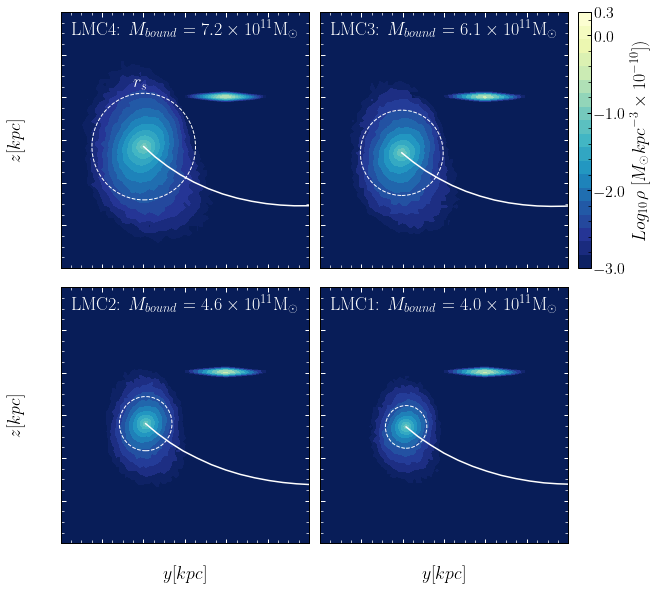

In [330]:
random6 = np.random.randint(0, len(LMC6), 10000)
random5 = np.random.randint(0, len(LMC5), 10000)
random4 = np.random.randint(0, len(LMC4), 10000)
random3 = np.random.randint(0, len(LMC3), 10000)

fig, ax = plt.subplots(2, 2, figsize=(9, 8), sharex=True, sharey=True)
#ax[0][0].scatter(LMC6[random6,1]-41, LMC6[random6,2]-28, s=0.1, c='k')


ax[0][0].contourf(binsx_lmc6[:100]+dx6, binsy_lmc6[:100]+dy6, np.log10(np.abs(h_lmc6.T)), levels=np.linspace(-3, 0.3, 20), cmap='YlGnBu_r'
                      , vmin=-3, vmax=0.3)


im1 = ax[0][0].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), levels=np.linspace(-3, 0.3, 20), cmap='YlGnBu_r'
                  ,vmin=-3, vmax=0.3)

#ax[0][0].scatter(0, 0, c='k')
#ax[0][0].plot([-10, 10], [0, 0], c='k')
ax[0][0].set_facecolor("#081d58") 


ax[0][1].contourf(binsx_lmc5[:100]+dx5, binsy_lmc5[:100]+dy5, np.log10(np.abs(h_lmc5.T)), 20, cmap='YlGnBu_r', 
                 vmin=-3, vmax=0.3)
ax[0][1].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r'
                  ,vmin=-3, vmax=0.3)



ax[0][1].set_facecolor("#081d58") 


ax[1][0].contourf(binsx_lmc4[:100]+dx4, binsy_lmc4[:100]+dy4, np.log10(np.abs(h_lmc4.T)), 20, cmap='YlGnBu_r'
                 , vmin=-3, vmax=0.3)
ax[1][0].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r'
                  , vmin=-3, vmax=0.3)


ax[1][0].set_facecolor("#081d58") 


ax[1][1].contourf(binsx_disk[:100], binsy_disk[:100], np.log10(np.abs(h_disk.T)), 20, cmap='YlGnBu_r'
                  , vmin=-3, vmax=0.3)
ax[1][1].contourf(binsx_lmc3[:100]+dx3, binsy_lmc3[:100]+dy3, np.log10(np.abs(h_lmc3.T)), 20, cmap='YlGnBu_r'
                 , vmin=-3, vmax=0.3)

ax[1][1].set_facecolor("#081d58") 

circle1 = plt.Circle((lmc6_wrt_mw[111,1], lmc6_wrt_mw[111,2]), 25, color='w', fill=False, ls='--')
circle2 = plt.Circle((lmc5_wrt_mw[109,1],lmc5_wrt_mw[109,2]), 20, color='w', fill=False, ls='--')
circle3 = plt.Circle((lmc4_wrt_mw[114,1],lmc4_wrt_mw[114,2]), 12.7, color='w', fill=False, ls='--')
circle4 = plt.Circle((lmc3_wrt_mw[90,1],lmc3_wrt_mw[90,2]), 10, color='w', fill=False, ls='--')

ax[0][0].add_artist(circle1)
ax[0][1].add_artist(circle2)
ax[1][0].add_artist(circle3)
ax[1][1].add_artist(circle4)

bounds = [-3, -2, -1, 0, 0.3]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cax = ax[0][1].inset_axes([1.04, 0.0, 0.05, 1])
#im1.set_clim(-3, 0.3)
cbar = fig.colorbar(im1,
                    cax=cax, extend = 'both',
                    ticks=[-4, -3, -2, -1, 0, 0.3])
cbar.set_label(r'$Log_{10}\rho\ [M_{\odot} kpc^{-3} \times 10^{-10}])$')
#cbar.set_clim(-3.0, 0.3)

#cbar = fig.colorbar. ColorbarBase(im1, cax=cax, cmap='YlGnBu_r',
#                       norm=mpl.colors.Normalize(vmin=-3, vmax=0.3))
#cbar.set_clim(-4.0, 1.0)

fig.tight_layout()

ax[0][0].tick_params(axis='both', colors='w', which='both')
ax[0][1].tick_params(axis='both', colors='w', which='both')
ax[1][0].tick_params(axis='both', colors='w', which='both')
ax[1][1].tick_params(axis='both', colors='w', which='both')

#ax[0][0].tick_params(axis='y', colors='w')

## LMC orbit
ax[0][0].plot(lmc6_wrt_mw[:112,1],lmc6_wrt_mw[:112,2], c='w')
ax[0][1].plot(lmc5_wrt_mw[:110,1],lmc5_wrt_mw[:110,2], c='w')
ax[1][0].plot(lmc4_wrt_mw[:115,1],lmc4_wrt_mw[:115,2], c='w')
ax[1][1].plot(lmc3_wrt_mw[:91,1],lmc3_wrt_mw[:91,2], c='w')


ax[0][0].set_xlim(-80, 40)
ax[0][0].set_ylim(-80, 40)
ax[0][0].set_yticks(np.arange(-80, 41, 20))
ax[0][1].set_xticks(np.arange(-80, 41, 20))
ax[0][0].set_ylabel('$z[kpc]$')
ax[1][0].set_ylabel('$z[kpc]$')

ax[1][0].set_xlabel('$y[kpc]$')
ax[1][1].set_xlabel('$y[kpc]$')
ax[0][0].text(-75, 30, r'LMC4: $M_{bound}=7.2\times 10^{11}$M$_{\odot}$', fontsize=18, c='w')
ax[0][1].text(-75, 30, r'LMC3: $M_{bound}=6.1\times 10^{11}$M$_{\odot}$', fontsize=18, c='w')
ax[1][0].text(-75, 30, r'LMC2: $M_{bound}=4.6\times 10^{11}$M$_{\odot}$', fontsize=18, c='w')
ax[1][1].text(-75, 30, r'LMC1: $M_{bound}=4.0\times 10^{11}$M$_{\odot}$', fontsize=18, c='w')
ax[0][0].text(-45, 5, '$r_s$', fontsize=18, c='w')


savefig('../../MW-LMC-BFE/figures_docs/LMC_bound_particles.png', bbox_inches='tight')
savefig('../../MW-LMC-BFE/figures_docs/LMC_bound_particles.pdf', bbox_inches='tight')

In [43]:
np.sqrt((41**2) + (28**2)) - 10

49.64876634922564

In [ ]:
the edge of 

In [10]:
LMC3_bound = np.sum(LMC3[:,6])
LMC4_bound = np.sum(LMC4[:,6])
LMC5_bound = np.sum(LMC5[:,6])
LMC6_bound = np.sum(LMC6[:,6])


In [125]:
bound_mass_ratio = [LMC3_bound/LMC_mass[0], LMC4_bound/LMC_mass[1], LMC5_bound/LMC_mass[2], LMC6_bound/LMC_mass[3]]

In [126]:
bound_mass = [LMC3_bound, LMC4_bound, LMC5_bound, LMC6_bound]

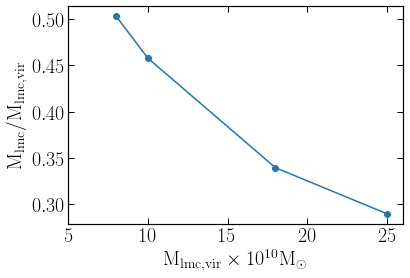

In [31]:
plot(LMC_mass, bound_mass_ratio, '-o')
xlabel(r'$\rm{M_{lmc,vir}} \times 10^{10} \rm{M_{\odot}}$')
ylabel(r'$\rm{M_{lmc}/M_{lmc,vir}}$')
xlim(5, 26)
savefig('LMC_bound_ratio.pdf', bbox_inches='tight')

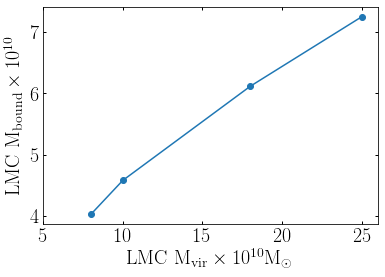

In [58]:
plot(LMC_mass, bound_mass, '-o')
xlabel(r'$\rm{M_{lmc,vir}} \times 10^{10} \rm{M_{\odot}}$')
ylabel(r'$\rm{M_{lmc}} \times 10^{10} $')
xlim(5, 26)
savefig('LMC_bound_mass.pdf', bbox_inches='tight')

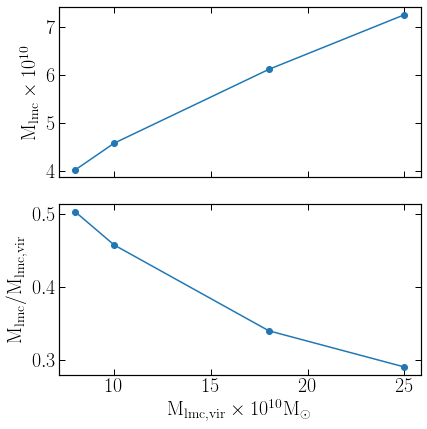

In [137]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
ax[1].plot(LMC_mass, bound_mass_ratio, '-o')
ax[0].plot(LMC_mass, bound_mass, '-o')
fig.tight_layout()
ax[1].set_ylabel(r'$\rm{M_{lmc}/M_{lmc,vir}}$')
ax[1].set_xlabel(r'$\rm{M_{lmc,vir}} \times 10^{10} \rm{M_{\odot}}$')
ax[0].set_ylabel(r'$\rm{M_{lmc}} \times 10^{10} $')
savefig('../../MW-LMC-BFE/figures_docs/LMC_bound_mass_fraction.pdf', bbox_inches='tight')

In [4]:
# From el gato

In [49]:
def enclosed_mass(pos, m):
    r = np.sqrt(np.sum(pos**2, axis=1))
    print(np.max(r))
    r_bins = np.arange(0, 100, 1)
    dr = (r_bins[1]-r_bins[0])/2.
    nbins = len(r_bins)
    rho = np.zeros(nbins-1)
    m_tot = np.zeros(nbins)
    m_cumulative = np.zeros(nbins)
    for i in range(nbins-1):
        index = np.where((r<r_bins[i+1]) & (r>=r_bins[i]))[0]
        m_shell = np.sum(m[index])
        v = 4/3. * np.pi * (r_bins[i+1]**3 - r_bins[i]**3)
        rho[i] = m_shell/v
        m_tot[i] = m_shell
        m_cumulative[i] = np.sum(m_tot[:i+1])
    return rho, r_bins[:-1] + dr, m_tot[:-1], m_cumulative[:-1]

In [87]:
M3 = enclosed_mass(LMC3[:,0:3], LMC3[:,6])

83.97161190552019


In [88]:
np.sum(np.ones(len(LMC5_init))*(18/len(LMC5_init)))

17.99999999999998

In [93]:
M5i = enclosed_mass(LMC5_init[:,:3], LMC5_init[:,6])
M5 = enclosed_mass(LMC5[:,:3], LMC5[:,6])

41602.229840258035
114.61861656443969


In [90]:
def hernquist_mass(r, a, M):
    return M*r**2. / (r+a)**2.

In [91]:
m3 = hernquist_mass(M3[1], 10, 8)

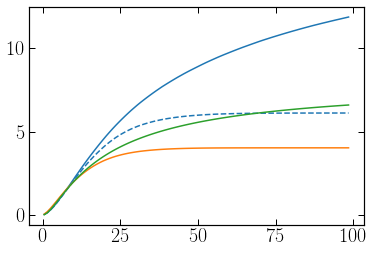

In [96]:
plot(M5i[1], M5i[3], c='C0')
plot(M5[1], M5[3], c='C0', ls ='--')
plot(M3[1], M3[3], c='C1')
plot(M3[1], m3, c='C2')